<a href="https://colab.research.google.com/github/Sauravhuskie/680---assignment-2/blob/main/CSCI680_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##References
1. https://www.geeksforgeeks.org/how-to-convert-categorical-data-to-binary-data-in-python/

2. https://scikit-learn.org/stable/modules/feature_selection.html



According to the World Health Organization (WHO), Stroke is the 2nd leading cause of
death globally, responsible for approximately 11% of total deaths. In this assignment, we
will work on the dataset that is used to predict whether a patient is likely to get stroke based
on the input parameters like gender, age, various diseases, smoking status and others.
The dataset is severely imbalanced with far more samples of negative class. Please see the
attributes information below. You should handle missing values and categorical features
accordingly.
1) Id: Unique identifier
2) Gender: "Male", "Female" or "Other"
3) Age: Age of the patient
4) Hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) Heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has heart disease
6) Ever_married: "No" or "Yes"
7) Work_type: "Children", "Govt_job", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) Avg_glucose_level: Average glucose level in blood
10) BMI: Body mass index
11) Smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) Stroke: 1 if the patient had a stroke or 0 if not


## Importing the data and creating the dataset

In [140]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [141]:
#importing the data
datalink = "https://raw.githubusercontent.com/Sauravhuskie/CSCI680---Assignment4/main/healthcare-dataset-stroke-data.csv"
stroke_data = pd.read_csv(datalink) 



In [142]:
df = stroke_data
#get all categorical columns
cat_columns = df.select_dtypes(['object']).columns

#convert all categorical columns to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])

#view updated DataFrame
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,51676,1,61.0,0,0,0,1,1,202.21,NaN,1,1
2,31112,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,0,0,0,83.75,NaN,1,0
5106,44873,1,81.0,0,0,0,1,0,125.20,40.0,1,0
5107,19723,1,35.0,0,0,0,1,1,82.99,30.6,1,0
5108,37544,0,51.0,0,0,0,0,1,166.29,25.6,0,0


Chopping the data in X and y to make them ready for the questions.

In [168]:

df1 =df.dropna(axis='columns')
X = df1.drop(columns =['id','stroke'])
y = Target = df1.stroke

## Q1. Train a Decision Tree, Random Forest and Gradient Boosting algorithm to set a baseline performance. Use ROC AUC and Average Precision metrics for your evaluation. Also, show the precision and recall for both classes. Don’t balance the dataset.

###Training Decision tree classifier

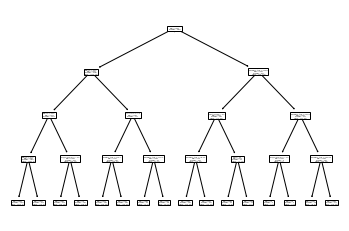

In [144]:
# performing test and train split
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X,Target,
                                                    stratify=stroke_data.stroke,
                                                    random_state=0)
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train_tree, y_train_tree)

from sklearn.tree import plot_tree
tree_dot = plot_tree(tree, feature_names=df1.columns)
tree.score(X_test_tree, y_test_tree)
y_pred_tree = tree.predict(X_test_tree)


In [145]:
from sklearn.metrics import accuracy_score
tree_accuracy = accuracy_score(y_test_tree, y_pred_tree, normalize=False)
tree_score = tree.score(X_test_tree, y_test_tree)


In [146]:
y_score_tree = tree.predict_proba(X_test_tree)[:, 1]
#calculate precision and recall
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test_tree, y_score_tree)

###Training RandomForestClassifier

In [147]:
# performing test and train split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X,Target,
                                                    stratify=stroke_data.stroke,
                                                    random_state=0)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(warm_start=True)
estimator_range = range(1, 100, 5)
rf.fit(X_train_rf, y_train_rf)
y_pred_rf = rf.predict(X_test_rf)

In [148]:
from sklearn.metrics import accuracy_score
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf, normalize=False)
rf_score = rf.score(X_test_rf, y_test_rf)



In [149]:
y_score_rf = rf.predict_proba(X_test_rf)[:, 1]
#calculate precision and recall
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test_rf, y_score_rf)

### Traininng Gradient Boosting Classifier

In [150]:
# performing test and train split
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X,Target,
                                                    stratify=stroke_data.stroke,
                                                    random_state=0)
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train_gb, y_train_gb)
gb.score(X_test_gb, y_test_gb)
y_pred_gb = gb.predict(X_test_gb)

In [151]:
from sklearn.metrics import accuracy_score
gb_accuracy = accuracy_score(y_test_gb, y_pred_gb, normalize=False)
gb_score = rf.score(X_test_gb, y_test)


In [152]:
y_score_gb = gb.predict_proba(X_test_gb)[:, 1]
#calculate precision and recall
precision_gb, recall_gb, thresholds_gb = precision_recall_curve(y_test_gb, y_score_gb)

 ### Creating ROC AUC for decision tree, gradient boosting, and random forest



Text(0.5, 0.98, 'ROC curve comparison')

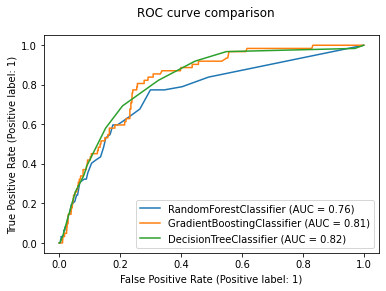

In [153]:
import warnings
from sklearn.metrics import plot_roc_curve
warnings.filterwarnings('ignore')
rfc_disp = plot_roc_curve(rf, X_test, y_test)
gb_disp = plot_roc_curve(gb, X_test, y_test, ax = rfc_disp.ax_)
tree_disp = plot_roc_curve(tree, X_test, y_test, ax = rfc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")



###Accuracy Scores

In [154]:
print("Algorithm    |Number of Accurate Predictions    |  Score")
print ("Decision Tree |   ",tree_accuracy, " |      ", tree_score )
print ("Random Forest  |   ",rf_accuracy,  " |      ", rf_score )
print ("Gradiant Boosting |   ",gb_accuracy, " |     ", gb_score )



Algorithm    |Number of Accurate Predictions    |  Score
Decision Tree |    1214  |       0.9499217527386542
Random Forest  |    1214  |       0.9499217527386542
Gradiant Boosting |    1216  |      0.9499217527386542


###Precision and Recall

In [155]:
import numpy as np

In [156]:
print ("Decision Tree average Precision",np.average(precision_tree), "and average Recall", np.average(recall_tree))
print ("Random Forest average Precision",np.average(precision_rf), "and average Recall", np.average(recall_rf))
print ("Decision Gradient Boosting average Precision",np.average(precision_gb), "and average Recall", np.average(recall_gb))



Decision Tree average Precision 0.18099939304490706 and average Recall 0.535483870967742
Random Forest average Precision 0.15529251113620104 and average Recall 0.2732258064516129
Decision Gradient Boosting average Precision 0.12738934707629493 and average Recall 0.6246705158779967


### Precision Recall for Decision Tree




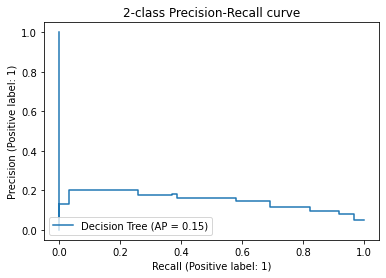

In [157]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    tree, X_test_tree, y_test_tree, name="Decision Tree"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

### Precision Recall for Gradient Boostion


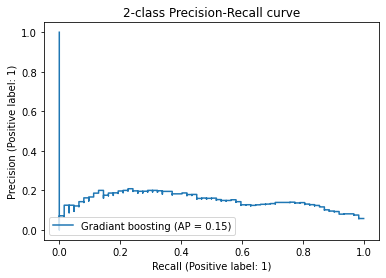

In [158]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    gb, X_test_gb, y_test_gb, name="Gradiant boosting"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

### Precision Recall for Random forest


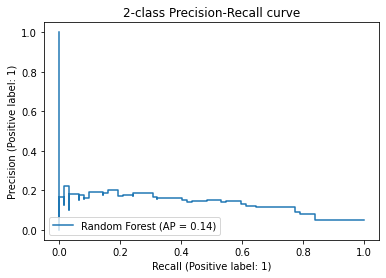

In [159]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    rf, X_test_rf, y_test_rf, name="Random Forest"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

##Q2. Balance the dataset using any 4 methods we have discussed in the class and again train a Decision Tree, Random Forest and Gradient Boosting algorithm to compare the performance with models from Q1.

The 4 methods to balance a datset are : oversampling, undersampling, class weight, and decision threshold. As oversampling workes better than undersampling therefore I will do Oversampling.


(3832, 9)
(7290, 9)
[3645 3645]


##recreating decision tree model with Over Sampling



(3832, 9)
(7290, 9)
[3645 3645]


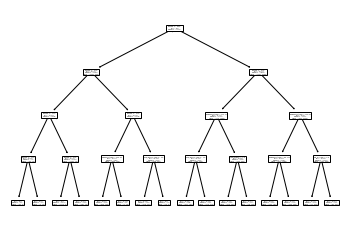

In [124]:
# performing test and train split
X_train_tree1, X_test_tree1, y_train_tree1, y_test_tree1 = train_test_split(X,Target,
                                                    stratify=stroke_data.stroke,
                                                    random_state=0)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_os_tree, y_train_os_tree = ros.fit_resample(X_train_tree1, y_train_tree1)
print(X_train_tree1.shape)
print(X_train_os_tree.shape)
print(np.bincount(y_train_os_tree))

from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree1 = DecisionTreeClassifier(max_depth=4)
tree1.fit(X_train_os_tree, y_train_os_tree)

from sklearn.tree import plot_tree
tree1_dot = plot_tree(tree1, feature_names=df1.columns)
tree1.score(X_test_tree1, y_test_tree1)
y_pred_tree1 = tree.predict(X_test_tree1)

from sklearn.metrics import accuracy_score
tree_accuracy1 = accuracy_score(y_test_tree1, y_pred_tree1, normalize=False)
tree_score1 = tree.score(X_test_tree1, y_test_tree1)

y_score_tree1 = tree.predict_proba(X_test_tree1)[:, 1]
#calculate precision and recall
precision_tree1, recall_tree1, thresholds_tree1 = precision_recall_curve(y_test_tree1, y_score_tree1)


##recreating random forest  model


In [129]:
# performing test and train split
X_train_df1, X_test_df1, y_train_df1, y_test_df1 = train_test_split(X,Target,
                                                    stratify=stroke_data.stroke,
                                                    random_state=0)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_os_df1, y_train_os_df1 = ros.fit_resample(X_train_df1, y_train_df1)
print(X_train_df1.shape)
print(X_train_os_df1.shape)
print(np.bincount(y_train_os_df))

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(warm_start=True)
estimator_range = range(1, 100, 5)
rf.fit(X_train_os_df1, y_train_os_df1)
y_pred_rf1 = rf.predict(X_test_df1)

from sklearn.metrics import accuracy_score
rf_accuracy1 = accuracy_score(y_test_df1, y_pred_rf1, normalize=False)
rf_score1= rf.score(X_test_df1, y_test_df1)
y_score_rf1= rf.predict_proba(X_test_df1)[:, 1]
#calculate precision and recall
precision_rf1, recall_rf1, thresholds_rf1 = precision_recall_curve(y_test_df1, y_score_rf1)


(3832, 9)
(7290, 9)
[3645 3645]


##rereating Gradiant Boosting Model


In [130]:
# performing test and train split
X_train_gb1, X_test_gb1, y_train_gb1, y_test_gb1 = train_test_split(X,Target,
                                                    stratify=stroke_data.stroke,
                                                    random_state=0)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_os_gb1, y_train_os_gb1 = ros.fit_resample(X_train_gb1, y_train_gb1)
print(X_train_gb1.shape)
print(X_train_os_gb1.shape)
print(np.bincount(y_train_os_gb1))

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train_os_gb1, y_train_os_gb1)
estimator_range = range(1, 100, 5)
gb.fit(X_train_os_gb1, y_train_os_gb1)
y_pred_gb1 = gb.predict(X_test_gb1)

from sklearn.metrics import accuracy_score
gb_accuracy1 = accuracy_score(y_test_gb1, y_pred_rf1, normalize=False)
gb_score1= gb.score(X_test_gb1, y_test_gb1)
y_score_gb1= gb.predict_proba(X_test_gb1)[:, 1]
#calculate precision and recall
precision_gb1, recall_gb1, thresholds_gb1 = precision_recall_curve(y_test_gb1, y_score_gb1)

(3832, 9)
(7290, 9)
[3645 3645]


##Change in Accuracy scores

In [131]:
print("Algorithm    |Number of Accurate Predictions    |  Score")
print ("Decision Tree |   ",tree_accuracy, " |      ", tree_score )
print ("Random Forest  |   ",rf_accuracy,  " |      ", rf_score )
print ("Gradiant Boosting |   ",gb_accuracy, " |     ", gb_score )
print ("Decision Tree with Oversampling|   ",tree_accuracy1, " |      ", tree_score1 )
print ("Random Forest with Oversampling |   ",rf_accuracy1,  " |      ", rf_score1 )
print ("Gradiant Boosting oversampling |   ",gb_accuracy1, " |     ", gb_score1 )



Algorithm    |Number of Accurate Predictions    |  Score
Decision Tree |    1214  |       0.9499217527386542
Random Forest  |    1215  |       0.9507042253521126
Gradiant Boosting |    1216  |      0.9507042253521126
Decision Tree with Oversampling|    1214  |       0.9499217527386542
Random Forest with Oversampling |    1206  |       0.9436619718309859
Gradiant Boosting oversampling |    1206  |      0.7433489827856025


##Creating ROC curve after Oversampling

Text(0.5, 0.98, 'ROC curve comparison after Oversampling')

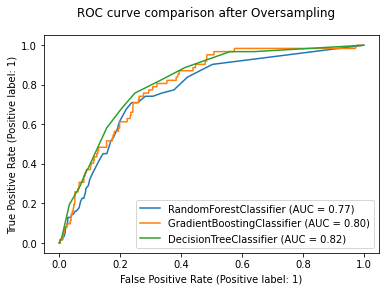

In [136]:
import warnings
from sklearn.metrics import plot_roc_curve
warnings.filterwarnings('ignore')

rfc_disp1 = plot_roc_curve(rf, X_test_df1, y_test_df1)
gb_disp1 = plot_roc_curve(gb, X_test_gb1, y_test_gb1, ax = rfc_disp1.ax_)
tree_disp1 = plot_roc_curve(tree1, X_test_tree1, y_test_tree1, ax = rfc_disp1.ax_)
rfc_disp1.figure_.suptitle("ROC curve comparison after Oversampling")



##Precision and Recall after oversampling

In [166]:
print("\n After Oversampling")

print ("Decision Tree average Precision with Oversampling",np.average(precision_tree1), "and average Recall", np.average(recall_tree1))
print ("Random Forest average Precision with Oversampling",np.average(precision_rf1), "and average Recall", np.average(recall_rf1))
print ("Decision Gradient Boosting average Precision with Oversampling",np.average(precision_gb1), "and average Recall", np.average(recall_gb1))


 After Oversampling
Decision Tree average Precision with Oversampling 0.18099939304490706 and average Recall 0.535483870967742
Random Forest average Precision with Oversampling 0.13457274739620567 and average Recall 0.2674297606659729
Decision Gradient Boosting average Precision with Oversampling 0.11461398164406675 and average Recall 0.6864774932988261


##Conclusion:Oversampling did not improve the score significantly.

##Q3. Find the important features using Random Forest and Gradient Boosting algorithms.


In [227]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# performing test and train split
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X,Target,
                                                    stratify=stroke_data.stroke,
                                                    random_state=0)

# create ranking among all features by selecting only one
rfe = RFE(GradientBoostingClassifier(), n_features_to_select=1)
rfe1 = RFE(RandomForestClassifier(), n_features_to_select=1)
rfe.fit(X_train, y_train)
GB_ranking = rfe.ranking_.tolist()
Features = rfe.feature_names_in_.tolist()
rfe1.fit(X_train, y_train)
RF_ranking = rfe1.ranking_.tolist()



In [234]:
zipped = list(zip(Features, GB_ranking, RF_ranking))
df = pd.DataFrame(zipped, columns=['Feature Name', 'Gradient Boost Ranking', 'Random Forest Ranking'])
print(df)


        Feature Name  Gradient Boost Ranking  Random Forest Ranking
0             gender                       9                      6
1                age                       2                      2
2       hypertension                       7                      8
3      heart_disease                       3                      7
4       ever_married                       6                      9
5          work_type                       4                      4
6     Residence_type                       8                      5
7  avg_glucose_level                       1                      1
8     smoking_status                       5                      3


Conclusion: Average_glucose level ranks 1, followed by age,heart disease, work type or, smoking etc.

##Q4. Write a brief report on how different data balancing techniques improved the performance of your models.

###Gradient Boositing balancing

In [243]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 

from sklearn.model_selection import cross_validate
undersample_pipe = make_imb_pipeline(RandomUnderSampler(), GradientBoostingClassifier())
scores = cross_validate(undersample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))

oversample_pipe = make_imb_pipeline(RandomOverSampler(), GradientBoostingClassifier())
oversampling_scores = cross_validate(oversample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))

normal_pipe = make_imb_pipeline( GradientBoostingClassifier())
normal_scores = cross_validate(normal_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("Test Scores for no balancing of Gradient Boosting")
print("Test ROC accuracy score", normal_scores['test_roc_auc'].mean())
print("Test average precision score",normal_scores['test_average_precision'].mean())

print("Test Scores for random undersampling of Gradient Boosting")
print("Test ROC accuracy score", scores['test_roc_auc'].mean())
print("Test average precision score",scores['test_average_precision'].mean())

print("Test Scores for random oversampling of Gradient Boosting")
print("Test ROC accuracy score",oversampling_scores['test_roc_auc'].mean())
print("Test average precision score",oversampling_scores['test_average_precision'].mean())


Test Scores for no balancing of Gradient Boosting
Test ROC accuracy score 0.8277523607930961
Test average precision score 0.20032071308188987
Test Scores for random undersampling of Gradient Boosting
Test ROC accuracy score 0.8159971693371117
Test average precision score 0.18645083624393707
Test Scores for random oversampling of Gradient Boosting
Test ROC accuracy score 0.8115604694912554
Test average precision score 0.1931020572176992


### Random Forest data balancing

In [244]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 

from sklearn.model_selection import cross_validate
RFundersample_pipe = make_imb_pipeline(RandomUnderSampler(), RandomForestClassifier())
RFscores = cross_validate(RFundersample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))

RFoversample_pipe = make_imb_pipeline(RandomOverSampler(), RandomForestClassifier())
RFoversampling_scores = cross_validate(RFoversample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))

RFnormal_pipe = make_imb_pipeline( RandomForestClassifier())
RFnormal_scores = cross_validate(RFnormal_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("Test Scores for no balancing of RandomForest")
print("Test ROC accuracy score", RFnormal_scores['test_roc_auc'].mean())
print("Test average precision score",RFnormal_scores['test_average_precision'].mean())

print("Test Scores for random undersampling of Random Forest")
print("Test ROC accuracy score", RFscores['test_roc_auc'].mean())
print("Test average precision score",RFscores['test_average_precision'].mean())

print("Test Scores for random oversampling of Random Forest")
print("Test ROC accuracy score",RFoversampling_scores['test_roc_auc'].mean())
print("Test average precision score",RFoversampling_scores['test_average_precision'].mean())

Test Scores for no balancing of RandomForest
Test ROC accuracy score 0.7726009372746936
Test average precision score 0.15762938479196137
Test Scores for random undersampling of Random Forest
Test ROC accuracy score 0.8014415825302631
Test average precision score 0.17480326918999453
Test Scores for random oversampling of Random Forest
Test ROC accuracy score 0.7720588461846573
Test average precision score 0.15419546885337188


### Decision tree balancing

In [246]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 

from sklearn.model_selection import cross_validate
Tundersample_pipe = make_imb_pipeline(RandomUnderSampler(),DecisionTreeClassifier())
Tscores = cross_validate(Tundersample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))

Toversample_pipe = make_imb_pipeline(RandomOverSampler(), DecisionTreeClassifier())
Toversampling_scores = cross_validate(Toversample_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))

Tnormal_pipe = make_imb_pipeline( DecisionTreeClassifier())
Tnormal_scores = cross_validate(Tnormal_pipe,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))

print("Test Scores for no balancing of Decision Tree")
print("Test ROC accuracy score", Tnormal_scores['test_roc_auc'].mean())
print("Test average precision score",Tnormal_scores['test_average_precision'].mean())

print("Test Scores for random undersampling of DecisionTree")
print("Test ROC accuracy score", Tscores['test_roc_auc'].mean())
print("Test average precision score",RFscores['test_average_precision'].mean())

print("Test Scores for random oversampling of Decision Tree")
print("Test ROC accuracy score",Toversampling_scores['test_roc_auc'].mean())
print("Test average precision score",Toversampling_scores['test_average_precision'].mean())

Test Scores for no balancing of Decision Tree
Test ROC accuracy score 0.5316310115823455
Test average precision score 0.060568113748410334
Test Scores for random undersampling of DecisionTree
Test ROC accuracy score 0.6839305807546615
Test average precision score 0.17480326918999453
Test Scores for random oversampling of Decision Tree
Test ROC accuracy score 0.5373642527463723
Test average precision score 0.06421361822391745


##REPORT
Here I have tried random under sampling and random oversampling for the data. It is found that fro tree undrsampling improves precision and accuracy significantly but oversampling does not help at all. For, random forest also undersampling improves the score but oversampling does not improve ROC or precision. For,gradient boosting neither undersampling or, oversampling improves accuracy.
